Importing required libraries for A/B Testing : 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
### Setting up the random seed: 
random.seed(123)

Exploring the raw data for A/B Testing

In [4]:
df = pd.read_csv('/Users/maheshg/Dropbox/Sample Datasets Kaggle/A_B Test Results - Test Results.csv')

In [5]:
df.shape

(128, 4)

In [6]:
df.head()

,Metrics,Unnamed: 1,Variant,Unnamed: 3
0,Metric Category,Metric Name,Control,Treatment
1,Participants,user_counts,"5,191","5,314"
2,Account Type Switches,Free_to_Paid,"4,719","4,603"
3,Account Type Switches,Paid_to_Free,"1,056","1,088"
4,Account Type Switches,upsell,360,362


In [7]:
df.head(10)

,Metrics,Unnamed: 1,Variant,Unnamed: 3
0,Metric Category,Metric Name,Control,Treatment
1,Participants,user_counts,"5,191","5,314"
2,Account Type Switches,Free_to_Paid,"4,719","4,603"
3,Account Type Switches,Paid_to_Free,"1,056","1,088"
4,Account Type Switches,upsell,360,362
5,Account Type Switches,downgrade,"1,069","1,106"
6,Account Type Switches,switch_up_to_yearly,"2,744","2,722"
7,Account Type Switches,switch_up_to_monthly,"2,025","1,971"
8,Account Type Switches,upgrade_to_bronze,"2,802","2,734"
9,Account Type Switches,upgrade_to_silver,"1,342","1,295"


Note : 
AB testing is between control vs treatment baesd on the different metric details and depends on different metric 

In [8]:
df.info

<bound method DataFrame.info of                    Metrics             Unnamed: 1  Variant Unnamed: 3
0          Metric Category            Metric Name  Control  Treatment
1             Participants            user_counts    5,191      5,314
2    Account Type Switches           Free_to_Paid    4,719      4,603
3    Account Type Switches           Paid_to_Free    1,056      1,088
4    Account Type Switches                 upsell      360        362
..                     ...                    ...      ...        ...
123               Template    _5Plus_Table_Clones        2          2
124               Template      _1Plus_PDF_Clones      429        363
125               Template      _5Plus_PDF_Clones       23         11
126               Template  _1Plus_Any_App_Clones      159        159
127               Template  _5Plus_Any_App_Clones        3          7

[128 rows x 4 columns]>

Total Missing values from the dataframe :

Find missing values with any missing values 

In [15]:
# Remove the current header and set row 0 as the new header
df.columns = df.iloc[0]
df = df.drop(df.index[0]).reset_index(drop=True)
df.index = range(1, len(df) + 1)  # Set proper indexing starting from 1
df.head()

,Metric Category,Metric Name,Control,Treatment
1,Participants,user_counts,"5,191","5,314"
2,Account Type Switches,Free_to_Paid,"4,719","4,603"
3,Account Type Switches,Paid_to_Free,"1,056","1,088"
4,Account Type Switches,upsell,360,362
5,Account Type Switches,downgrade,"1,069","1,106"


In [16]:
missing_values = df.isna().any()
print("Find missing values with any missing values \n", missing_values)

Find missing values with any missing values 
 0
Metric Category    False
Metric Name        False
Control            False
Treatment          False
dtype: bool


In [17]:
total_missing = df.isna().sum().sum()
print(f'Total Missing values from the dataframe : {total_missing}') 

Total Missing values from the dataframe : 0


In [18]:
print(df.isna().sum())

0
Metric Category    0
Metric Name        0
Control            0
Treatment          0
dtype: int64


In [19]:
df.describe()

,Metric Category,Metric Name,Control,Treatment
count,127,127,127,127
unique,18,127,117,108
top,App and Store,user_counts,3,1
freq,27,1,3,4


In [20]:
df.head()

,Metric Category,Metric Name,Control,Treatment
1,Participants,user_counts,"5,191","5,314"
2,Account Type Switches,Free_to_Paid,"4,719","4,603"
3,Account Type Switches,Paid_to_Free,"1,056","1,088"
4,Account Type Switches,upsell,360,362
5,Account Type Switches,downgrade,"1,069","1,106"


In [21]:
df.columns

Index(['Metric Category', 'Metric Name', 'Control', 'Treatment'], dtype='object', name=0)

Checking the multiple columns NA values present or not 

In [22]:
df[['Metric Category', 'Metric Name', 'Control', 'Treatment']].isna().sum()

0
Metric Category    0
Metric Name        0
Control            0
Treatment          0
dtype: int64

In [34]:
from scipy.stats import ttest_ind

Function to present t test assuming independent samples : 

In [37]:
def run_t_test(control, treatment):
    # Ensure control and treatment are arrays or lists
    t_stat, p_val = ttest_ind(control, treatment, equal_var=False)
    return t_stat, p_val

In [42]:
def clean_and_convert(arr):
    return [float(i) for i in arr if i.replace('.', '', 1).isdigit()]

df['Control'] = df['Control'].apply(clean_and_convert)
df['Treatment'] = df['Treatment'].apply(clean_and_convert)

In [43]:
df['Control'] = df['Control'].apply(lambda x: [float(i) for i in x])
df['Treatment'] = df['Treatment'].apply(lambda x: [float(i) for i in x])

Running T Test for each metric : 

In [44]:
df[['t-statistic','p-value']] = df.apply(
    lambda row: pd.Series(run_t_test(row['Control'], row['Treatment'])),
    axis=1 
)

/Users/maheshg/Dropbox/git repos/PythonPractise/PythonPractise-1/study/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [45]:
print("Note : \nAB testing is between control vs treatment baesd on the different metric details and depends on different metric " )

Note : 
AB testing is between control vs treatment baesd on the different metric details and depends on different metric 


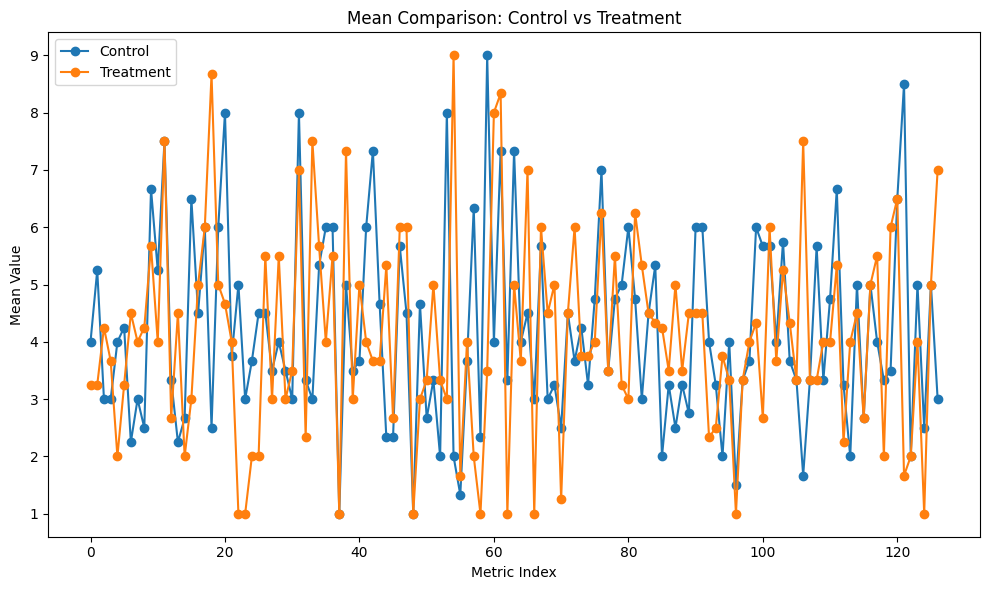

In [47]:
plt.figure(figsize=(10, 6))
control_means = df['Control'].apply(np.mean)
treatment_means = df['Treatment'].apply(np.mean)
x = np.arange(len(df))

plt.plot(x, control_means, label='Control', marker='o')
plt.plot(x, treatment_means, label='Treatment', marker='o')
plt.xlabel('Metric Index')
plt.ylabel('Mean Value')
plt.title('Mean Comparison: Control vs Treatment')
plt.legend()
plt.tight_layout()
plt.show()